In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle
import re

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn import cluster

prjDir = "/home/charles/Projects/QcMtlStreets"
sys.path.append(os.path.join(prjDir, "Python"))   
os.path.isdir(os.path.join(prjDir, "Python"))
from OsmnxElev import *

In [2]:
#Get the graph with bearings for all 5 neighbourhoods#

In [3]:
listNeighAll5=["Saint-Jean-Baptiste", 
               "Saint-Roch" ,
              "Vieux-Québec/Cap-Blanc/Colline parlementaire",
              "Saint-Sauveur",
              "Montcalm"]
graphQcAll5, shpQchAll5, dfPointsSubsetQchAll5 = getInducedSubgraphNeighQc(listNeighAll5)


File exists => reading graph
There are  0.17462765309849437  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste, Saint-Roch, Vieux-Québec/Cap-Blanc/Colline parlementaire, Saint-Sauveur, Montcalm


In [4]:
graphQcAll5=ox.add_edge_bearings(graphQcAll5)

In [5]:
dfEdgesAll5=getAllListEdgesDirectedMultigraph(graphQcAll5,listNeigh=listNeighAll5,
                                             listFeat=['grade_abs','bearing'])

In getAllListEdgesDirectedMultigraph => adding edge bearings


In [6]:
dfEdgesAll5.head()

startNode           startNeigh       endNode             endNeigh  \
0  1.832233e+09  Saint-Jean-Baptiste  1.832233e+09  Saint-Jean-Baptiste   
1  1.774756e+08  Saint-Jean-Baptiste  1.774762e+08  Saint-Jean-Baptiste   
2  1.774756e+08  Saint-Jean-Baptiste  1.652178e+08  Saint-Jean-Baptiste   
3  1.774756e+08  Saint-Jean-Baptiste  3.048305e+08  Saint-Jean-Baptiste   
4  1.832233e+09  Saint-Jean-Baptiste  2.477819e+09  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         1       1          (1, 1)            (1, 1)   
1     0.0324  328.701         1       1          (1, 1)            (1, 1)   
2     0.0303   58.025         1       1          (1, 1)            (1, 1)   
3     0.0296  238.391         1       1          (1, 1)            (1, 1)   
4     0.2838   15.665         1       1          (1, 1)            (1, 1)   

                          neighPairUndirected  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   

                            neighPairDirected  
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)

In [7]:
####Tests with 2D kernel denstiy estimation###

array([-1.07942532,  1.29918461,  0.63837375, -0.08496787,  0.79366135,
       -0.35245719, -0.90388421, -0.19017729,  1.9074354 , -1.03458516,
        0.00740155,  0.07940926,  0.24091938, -1.43183179, -1.1873453 ,
       -0.0176068 , -0.6897099 ,  0.28025622, -0.32982722,  0.96653479,
        1.53215374, -0.89112069,  0.10209593,  0.12765916,  0.04035141,
       -0.17766415,  0.37611926,  0.13186309, -0.57913197, -0.25336463,
        0.20192555, -1.31328611,  1.07935261, -0.76192122, -0.14609793,
       -0.93713547, -0.33058741,  1.55160974, -1.07816278, -1.03085158,
        0.20929261,  1.46970081, -1.40511523,  1.19401902,  0.58057227,
       -2.4605307 ,  0.06197528, -0.01965277, -0.60691048,  1.63778314])

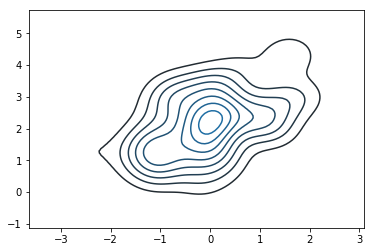

In [7]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x,y)
x

In [9]:
def getBearingGrade(dfEdges, neighPairFilter):
    dfEdges['neighPairUndirected'] == neighPairFilter
    arrayVals=dfEdges.loc[ dfEdges['neighPairUndirected'] == neighPairFilter,  ['bearing','grade_abs']].values
    bear, grade = arrayVals[:,0] , arrayVals[:,1]
    
    if(len(bear)!=len(grade)):
        raise Exception("fatal error in getBearingGrade => bearings and grade not same length - check na presence")
    
    return(bear, grade)
    

In [12]:
def plotKDEBearingVsGrade(dfEdges, neighPairFilter):

    bear, grade = getBearingGrade(dfEdges,neighPairFilter)
    
    fig =sns.kdeplot(bear, grade)
    fig.set_title(neighPairFilter)
    fig.set(xlabel="bearings", ylabel="grade")
    
    return(fig)

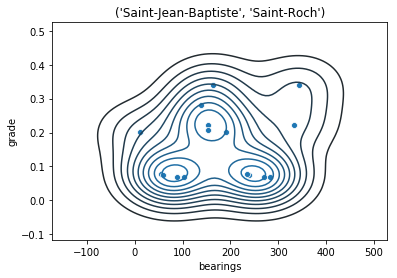

In [14]:
plotKDEBearingVsGrade(dfEdgesAll5, ("Saint-Jean-Baptiste", "Saint-Roch"))
bear, grade = getBearingGrade(dfEdgesAll5,("Saint-Jean-Baptiste", "Saint-Roch"))
sns.scatterplot(bear,grade)

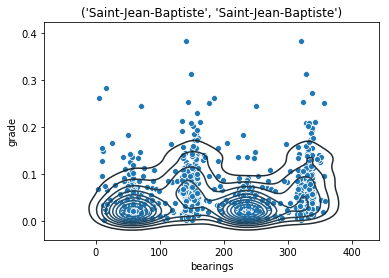

In [26]:
plotKDEBearingVsGrade(dfEdgesAll5,("Saint-Jean-Baptiste", "Saint-Jean-Baptiste"))
bear, grade = getBearingGrade(dfEdgesAll5,("Saint-Jean-Baptiste", "Saint-Jean-Baptiste"))
plot=sns.scatterplot(bear,grade)
fig = plot.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSJB_SJB_GradesVsBearings"))

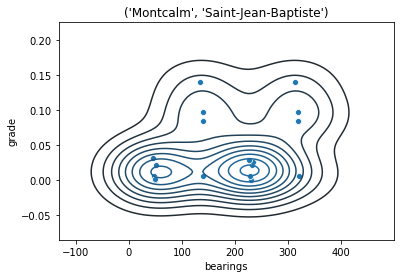

In [24]:
bear, grade = getBearingGrade(dfEdgesAll5,("Montcalm", "Saint-Jean-Baptiste"))
plotKDEBearingVsGrade(dfEdgesAll5,("Montcalm", "Saint-Jean-Baptiste"))
plot=sns.scatterplot(bear,grade)
fig = plot.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSJB_Montcal_GradesVsBearings"))

In [ ]:
plotKDEBearingVsGrade(dfEdgesAll5,("Saint-Jean-Baptiste", "Saint-Jean-Baptiste"))
bear, grade = getBearingGrade(dfEdgesAll5,("Saint-Jean-Baptiste", "Saint-Jean-Baptiste"))
sns.scatterplot(bear,grade)

In [ ]:
#Only a single observation => this fails
#plotKDEBearingVsGrade(("Montcalm", "Saint-Roch"))

In [31]:
####Tests with only scatter plots###

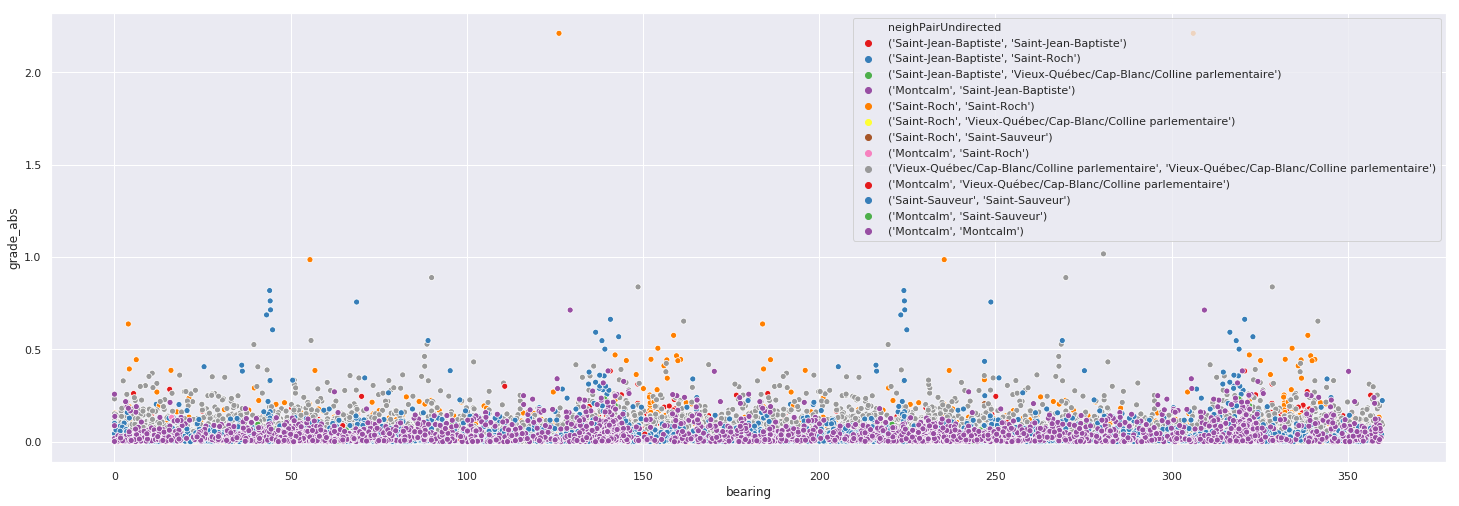

In [39]:
fig =sns.scatterplot(x='bearing',
        y='grade_abs',
        hue='neighPairUndirected',
        palette='Set1',
        data=dfEdgesAll5)

sns.set(rc={'figure.figsize':(25,8.27)})

#fig.get_legend().remove()

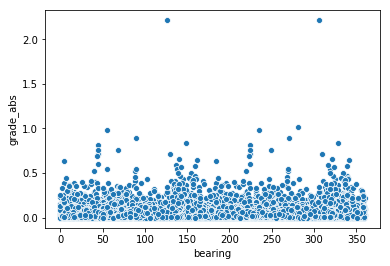

In [34]:
fig =sns.scatterplot(x='bearing',
        y='grade_abs',
        data=dfEdgesAll5)

In [41]:
n=10
bisect.bisect_left([ang*360/n for ang in range(0,n+1)], -8 )
bisect.bisect_left([ang*360/n for ang in range(0,n+1)], 370 )


11

In [42]:

def getBucketIndex(buckets, value):
    return(bisect.bisect_left(buckets, value ))


def getBucketRepresentative(buckets, value,useLeft=True):
    try:
        bucketIndex=getBucketIndex(buckets, value )
        if (useLeft):
            bucketRep=buckets[max(0,bucketIndex)]
        else:
            bucketRep=buckets[min(bucketIndex,len(bucket)-1)]
    except Exception as e:
        bucketRep=np.nan
        print("Fatal error trying to get bucket representative for value ", 
              value, ' - ',  e)
    
    return(bucketRep)

In [45]:
buckets=[ang*360/n for ang in range(0,n+1)]

bucketBearing = [ getBucketIndex(buckets,i) for i in dfEdgesAll5.bearing ]
bucketBearingRep = [ getBucketRepresentative(buckets,i) for i in dfEdgesAll5.bearing ]


print([ i for i in dfEdgesAll5.bearing][:4])
print(bucketBearing[:4] )
print([buckets[max(0,i-1)] for i in bucketBearing][:4])
print([buckets[i] for i in bucketBearing][:4])

[350.087, 328.701, 58.025, 238.391]
[10, 10, 2, 7]
[324.0, 324.0, 36.0, 216.0]
[360.0, 360.0, 72.0, 252.0]


In [235]:
ser, bins=pd.qcut(buckets, 10 ,retbins=True )
print("\nSer is pd array of categorical of intervals: ", ser, type(ser))
print("\nBins is np.array: " , bins, type(bins))


Ser is array of intervals:  [(-0.001, 36.0], (-0.001, 36.0], (36.0, 72.0], (72.0, 108.0], (108.0, 144.0], ..., (180.0, 216.0], (216.0, 252.0], (252.0, 288.0], (288.0, 324.0], (324.0, 360.0]]
Length: 11
Categories (10, interval[float64]): [(-0.001, 36.0] < (36.0, 72.0] < (72.0, 108.0] < (108.0, 144.0] ... (216.0, 252.0] < (252.0, 288.0] < (288.0, 324.0] < (324.0, 360.0]] <class 'pandas.core.arrays.categorical.Categorical'>

Bins is np.array:  [  0.  36.  72. 108. 144. 180. 216. 252. 288. 324. 360.] <class 'numpy.ndarray'>


In [270]:
quant=dfEdgesAll5.grade_abs.quantile([i/(10) for i in range(10+1)]).values
quant

array([0.     , 0.0035 , 0.0074 , 0.0122 , 0.0181 , 0.0251 , 0.0341 ,
       0.0481 , 0.0697 , 0.10889, 2.2105 ])

In [280]:
len(quant)

11

In [283]:
bucketGrade = [quant[0], quant[5], quant[7], quant[9], quant[10]] 
print(bucketGrade  )

[0.0, 0.0251, 0.04809999999999999, 0.10889000000000014, 2.2105]


In [284]:
pd.cut(dfEdgesAll5.grade_abs, 
                                   bins=bucketGrade)

0           (0.109, 2.21]
1        (0.0251, 0.0481]
2        (0.0251, 0.0481]
3        (0.0251, 0.0481]
4           (0.109, 2.21]
5         (0.0481, 0.109]
6         (0.0481, 0.109]
7           (0.0, 0.0251]
8         (0.0481, 0.109]
9           (0.109, 2.21]
10          (0.109, 2.21]
11          (0.0, 0.0251]
12       (0.0251, 0.0481]
13        (0.0481, 0.109]
14        (0.0481, 0.109]
15          (0.0, 0.0251]
16        (0.0481, 0.109]
17       (0.0251, 0.0481]
18          (0.0, 0.0251]
19          (0.0, 0.0251]
20          (0.0, 0.0251]
21          (0.0, 0.0251]
22        (0.0481, 0.109]
23          (0.109, 2.21]
24        (0.0481, 0.109]
25          (0.0, 0.0251]
26          (0.109, 2.21]
27       (0.0251, 0.0481]
28       (0.0251, 0.0481]
29       (0.0251, 0.0481]
               ...       
19652       (0.0, 0.0251]
19653       (0.0, 0.0251]
19654       (0.0, 0.0251]
19655       (0.0, 0.0251]
19656       (0.0, 0.0251]
19657       (0.0, 0.0251]
19658       (0.0, 0.0251]
19659       

In [279]:
countsAllGrades, divAllGrades = np.histogram(dfEdgesAll5.grade_abs, 
                                             [quant[0], quant[3], quant[8], quant[len(quant)-1]] )
print(countsAllGrades, divAllGrades)

[5892 9845 3945] [0.     0.0122 0.0697 2.2105]


In [ ]:
pd.cut(dfEdgesAll5.grade_abs, 
                                   bins=bucketGrade)

In [269]:
dfEdgesAll5.grade_abs.describe()

count    19682.000000
mean         0.045828
std          0.066798
min          0.000000
25%          0.009600
50%          0.025100
75%          0.057500
max          2.210500
Name: grade_abs, dtype: float64

In [230]:
print( ser[0], ser[0].left , ser[0].right)

(-0.001, 36.0] -0.001 36.0


In [55]:
pd.cut(buckets[1:3], bins=bins )

[(0.0, 36.0], (36.0, 72.0]]
Categories (10, interval[float64]): [(0.0, 36.0] < (36.0, 72.0] < (72.0, 108.0] < (108.0, 144.0] ... (216.0, 252.0] < (252.0, 288.0] < (288.0, 324.0] < (324.0, 360.0]]

In [56]:
dfEdgesAll5['bearingBucketIndex'] = bucketBearing
dfEdgesAll5['bearingBucketRep'] = bucketBearingRep


In [57]:
dfEdgesAll5.head()

startNode           startNeigh       endNode             endNeigh  \
0  1.832233e+09  Saint-Jean-Baptiste  1.832233e+09  Saint-Jean-Baptiste   
1  1.774756e+08  Saint-Jean-Baptiste  1.774762e+08  Saint-Jean-Baptiste   
2  1.774756e+08  Saint-Jean-Baptiste  1.652178e+08  Saint-Jean-Baptiste   
3  1.774756e+08  Saint-Jean-Baptiste  3.048305e+08  Saint-Jean-Baptiste   
4  1.832233e+09  Saint-Jean-Baptiste  2.477819e+09  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         1       1          (1, 1)            (1, 1)   
1     0.0324  328.701         1       1          (1, 1)            (1, 1)   
2     0.0303   58.025         1       1          (1, 1)            (1, 1)   
3     0.0296  238.391         1       1          (1, 1)            (1, 1)   
4     0.2838   15.665         1       1          (1, 1)            (1, 1)   

                          neighPairUndirected  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   

                            neighPairDirected  bearingBucketIndex  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   2   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   7   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   1   

   bearingBucketRep  
0             360.0  
1             360.0  
2              72.0  
3             252.0  
4              36.0

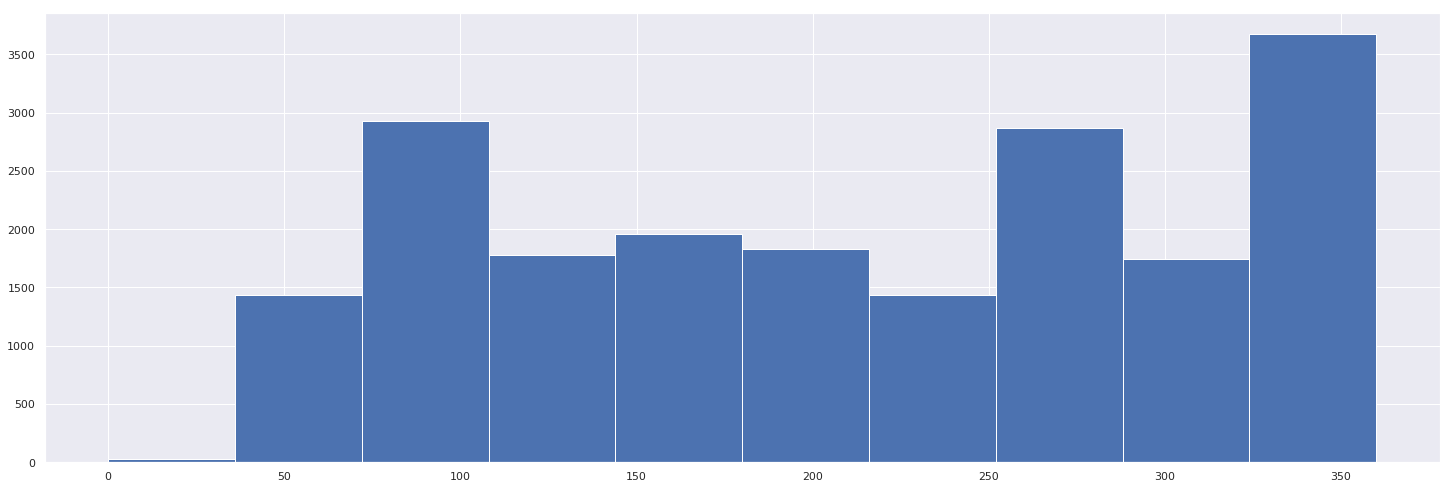

In [58]:
dfEdgesAll5.bearingBucketRep.hist()

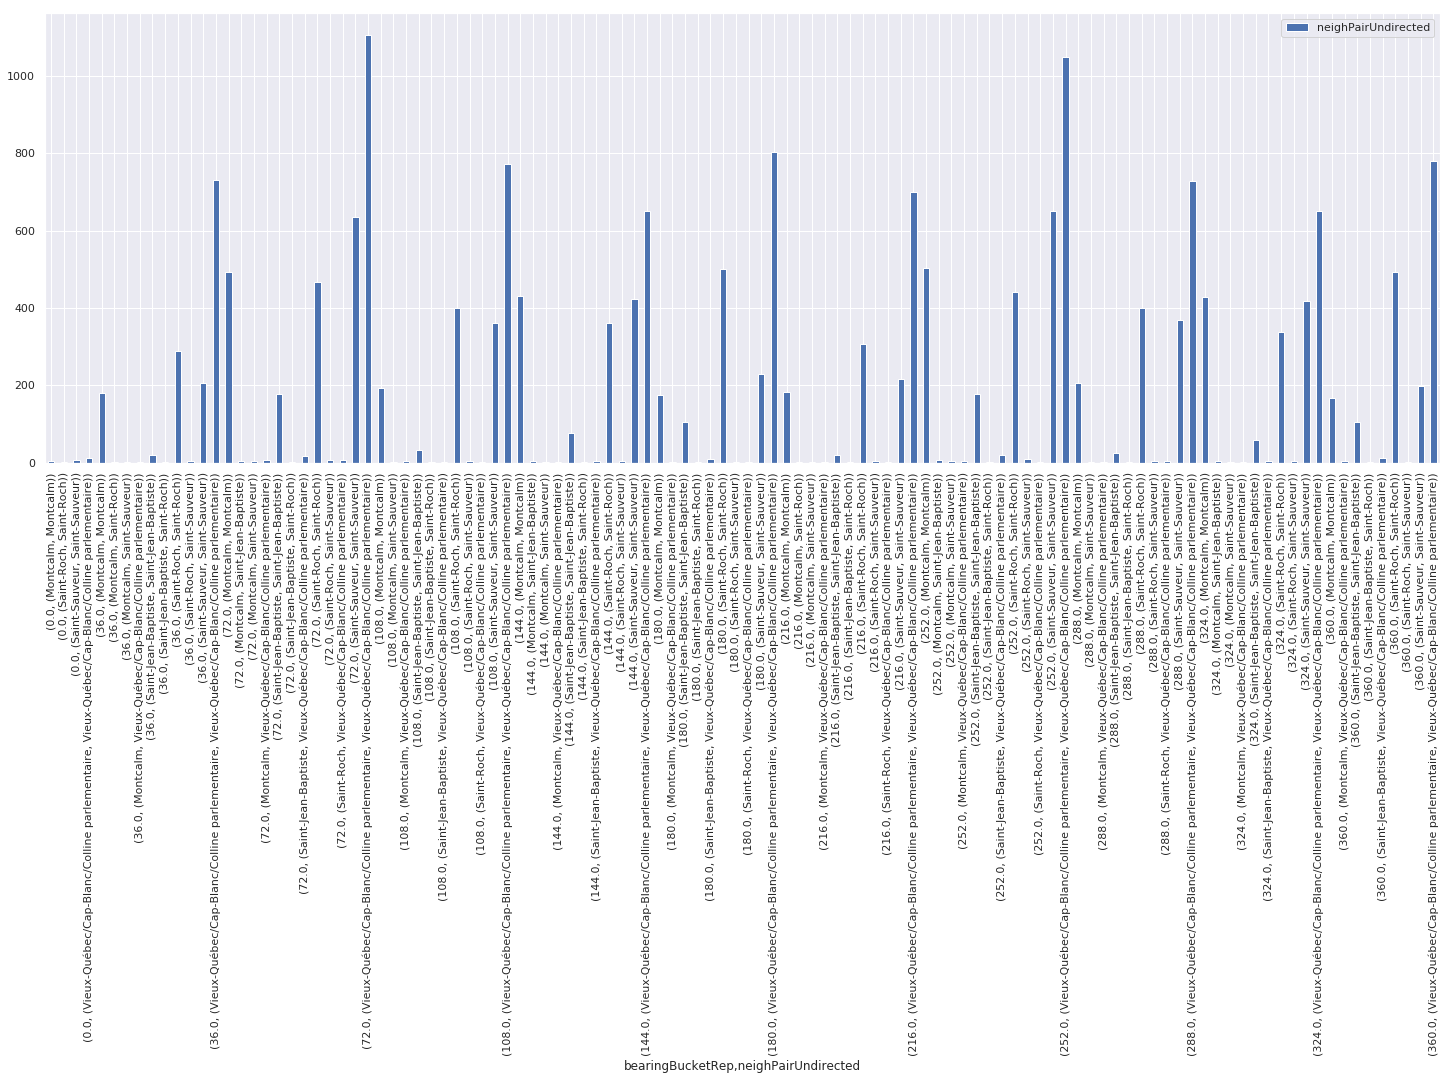

In [59]:
dfEdgesAll5[['bearingBucketRep','neighPairUndirected']]\
.groupby(['bearingBucketRep','neighPairUndirected'] )\
.agg({'neighPairUndirected': "count"})\
.plot(kind='bar')

In [60]:
'''
dfEdgesCCNeigh[['bearingBucketRep','neighPairUndirected']]\
.groupby(['bearingBucketRep','neighPairUndirected'] )\
.agg({'neighPairUndirected': "count"})     \
.reset_index('bearingBucketRep')\
.plot(color='neighPairUndirected', stacked=True)
'''
dfPlot=dfEdgesAll5[['bearingBucketRep','neighPairUndirected']]\
.groupby(['bearingBucketRep','neighPairUndirected'] )\
.agg({'neighPairUndirected': "count"})     \
.reset_index('bearingBucketRep')

dfPlot.rename(columns={'neighPairUndirected':'count'},inplace=True)
dfPlot.reset_index(inplace=True)
dfPlot['neighPairUndirected']=dfPlot['neighPairUndirected'].astype('category')
print(dfPlot.dtypes)

dfPlot.head()

neighPairUndirected    category
bearingBucketRep        float64
count                     int64
dtype: object


neighPairUndirected  bearingBucketRep  count
0                               (Montcalm, Montcalm)               0.0      4
1                           (Saint-Roch, Saint-Roch)               0.0      3
2                     (Saint-Sauveur, Saint-Sauveur)               0.0      8
3  (Vieux-Québec/Cap-Blanc/Colline parlementaire,...               0.0     11
4                               (Montcalm, Montcalm)              36.0    180

In [61]:
dfNeigh=dfPlot[['neighPairUndirected']].drop_duplicates()

dfNeigh['newNeigh']=dfNeigh.index
 

In [62]:
dfPlot=pd.merge(dfPlot, dfNeigh,
                 how='left', 
         on='neighPairUndirected')

[Text(0, 0, '0.0'),
 Text(0, 0, '36.0'),
 Text(0, 0, '72.0'),
 Text(0, 0, '108.0'),
 Text(0, 0, '144.0'),
 Text(0, 0, '180.0'),
 Text(0, 0, '216.0'),
 Text(0, 0, '252.0'),
 Text(0, 0, '288.0'),
 Text(0, 0, '324.0'),
 Text(0, 0, '360.0')]

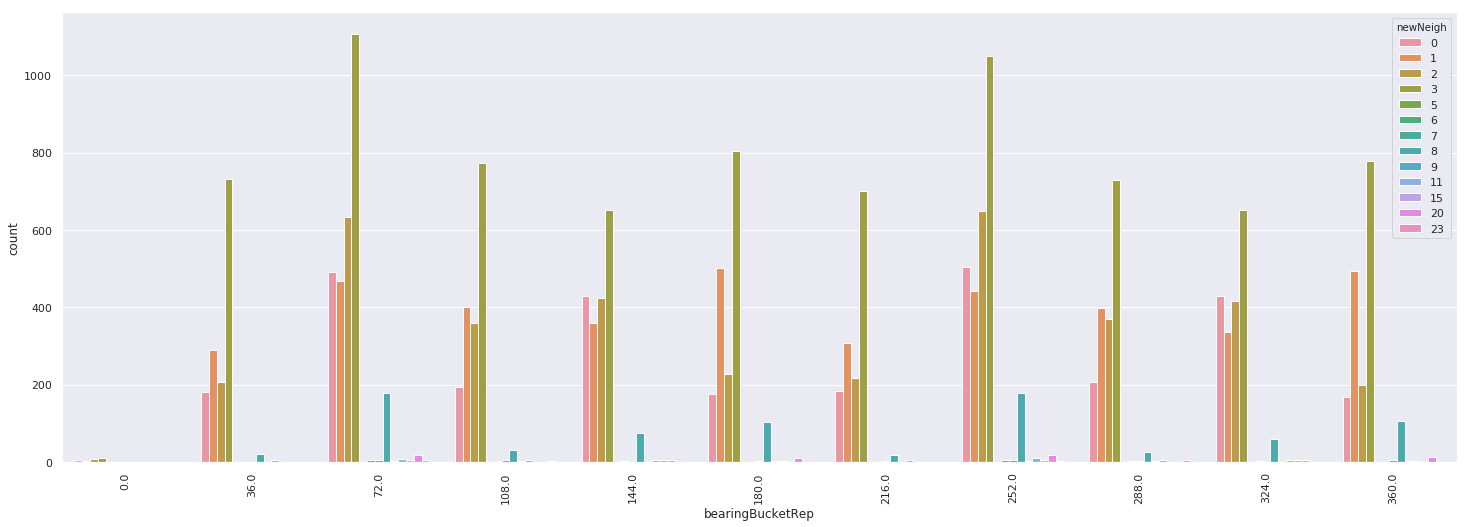

In [65]:
g=sns.barplot(x="bearingBucketRep",
             y="count",
             hue="newNeigh",
             data=dfPlot)
g.set_xticklabels(rotation=90,labels=dfPlot.bearingBucketRep.unique())

In [91]:
numQuant=3
dfEdgesAll5['gradeBuckets']=pd.qcut(dfEdgesAll5.grade_abs,numQuant)
dfEdgesAll5.head()

startNode           startNeigh       endNode             endNeigh  \
0  1.832233e+09  Saint-Jean-Baptiste  1.832233e+09  Saint-Jean-Baptiste   
1  1.774756e+08  Saint-Jean-Baptiste  1.774762e+08  Saint-Jean-Baptiste   
2  1.774756e+08  Saint-Jean-Baptiste  1.652178e+08  Saint-Jean-Baptiste   
3  1.774756e+08  Saint-Jean-Baptiste  3.048305e+08  Saint-Jean-Baptiste   
4  1.832233e+09  Saint-Jean-Baptiste  2.477819e+09  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         1       1          (1, 1)            (1, 1)   
1     0.0324  328.701         1       1          (1, 1)            (1, 1)   
2     0.0303   58.025         1       1          (1, 1)            (1, 1)   
3     0.0296  238.391         1       1          (1, 1)            (1, 1)   
4     0.2838   15.665         1       1          (1, 1)            (1, 1)   

                          neighPairUndirected  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   

                            neighPairDirected  bearingBucketIndex  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   2   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   7   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   1   

   bearingBucketRep      gradeBuckets  
0             360.0    (0.0429, 2.21]  
1             360.0  (0.0142, 0.0429]  
2              72.0  (0.0142, 0.0429]  
3             252.0  (0.0142, 0.0429]  
4              36.0    (0.0429, 2.21]

In [77]:
#dfEdgesAll5.loc[ dfEdgesAll5.neighPairUndirected == ('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste'), ] 
dfSjb=dfEdgesAll5.loc[ dfEdgesAll5.neighPairUndirected == ('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste'), ] 

In [83]:
counts, div = np.histogram( dfSjb.bearingBucketRep  )

In [84]:
#This is apparently essential to avoid dimension errors
div=div[0:-1] 

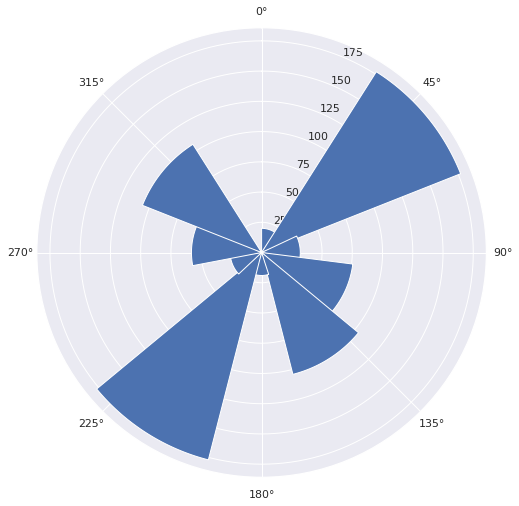

In [85]:
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(div * np.pi/180 - width * 0.5 , counts, width=width, bottom=0.0)

In [96]:
tupleGradeBuckets=dfEdgesAll5['gradeBuckets'].unique()
tupleGradeBuckets

[(0.0429, 2.21], (0.0142, 0.0429], (-0.001, 0.0142]]
Categories (3, interval[float64]): [(-0.001, 0.0142] < (0.0142, 0.0429] < (0.0429, 2.21]]

In [189]:
[ tupleGradeBuckets[i].length for i in range(len(tupleGradeBuckets))]

[2.1671, 0.0287, 0.015200000000000002]

In [154]:
from matplotlib import cm
cmInf=cm.get_cmap('inferno', 3)
cols=[cmInf(i) for i in range(3)]


<BarContainer object of 3 artists>

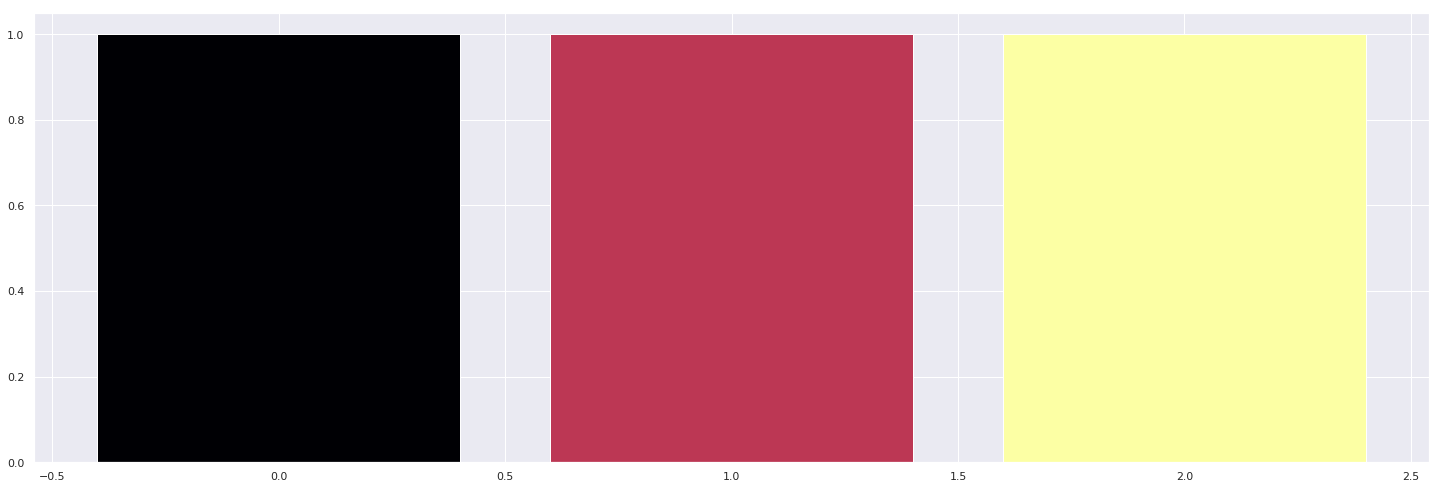

In [155]:
p=plt.subplot(111)
p.bar( [i for i in  range(3)],
      height=1,
      color=cols)

In [166]:
dfCols=pd.DataFrame({'gradeBuckets':tupleGradeBuckets,
                    'gradeBucketColor':[cmInf(2-i) for i in range(3)]})
dfCols

gradeBuckets                     gradeBucketColor
0    (0.0429, 2.21]  (0.988362, 0.998364, 0.644924, 1.0)
1  (0.0142, 0.0429]  (0.735683, 0.215906, 0.330245, 1.0)
2  (-0.001, 0.0142]  (0.001462, 0.000466, 0.013866, 1.0)

In [215]:
gradeBuckets
bins

array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.])

In [217]:
~np.any( np.isin( ['gradeBuckets'], dfEdgesAll5.columns) )
pd.cut(dfEdgesAll5.grade_abs, bins=bins )

0        (0.0, 36.0]
1        (0.0, 36.0]
2        (0.0, 36.0]
3        (0.0, 36.0]
4        (0.0, 36.0]
5        (0.0, 36.0]
6        (0.0, 36.0]
7        (0.0, 36.0]
8        (0.0, 36.0]
9        (0.0, 36.0]
10       (0.0, 36.0]
11       (0.0, 36.0]
12       (0.0, 36.0]
13       (0.0, 36.0]
14       (0.0, 36.0]
15       (0.0, 36.0]
16       (0.0, 36.0]
17       (0.0, 36.0]
18       (0.0, 36.0]
19       (0.0, 36.0]
20       (0.0, 36.0]
21       (0.0, 36.0]
22       (0.0, 36.0]
23       (0.0, 36.0]
24       (0.0, 36.0]
25       (0.0, 36.0]
26       (0.0, 36.0]
27       (0.0, 36.0]
28       (0.0, 36.0]
29       (0.0, 36.0]
            ...     
19652    (0.0, 36.0]
19653    (0.0, 36.0]
19654    (0.0, 36.0]
19655    (0.0, 36.0]
19656    (0.0, 36.0]
19657    (0.0, 36.0]
19658    (0.0, 36.0]
19659    (0.0, 36.0]
19660    (0.0, 36.0]
19661    (0.0, 36.0]
19662    (0.0, 36.0]
19663    (0.0, 36.0]
19664    (0.0, 36.0]
19665    (0.0, 36.0]
19666    (0.0, 36.0]
19667    (0.0, 36.0]
19668    (0.0

In [167]:
dfEdgesAll5=pd.merge(dfEdgesAll5, dfCols,
         how='left',
         on="gradeBuckets")

In [168]:
dfEdgesAll5.head()

startNode           startNeigh       endNode             endNeigh  \
0  1.832233e+09  Saint-Jean-Baptiste  1.832233e+09  Saint-Jean-Baptiste   
1  1.774756e+08  Saint-Jean-Baptiste  1.774762e+08  Saint-Jean-Baptiste   
2  1.774756e+08  Saint-Jean-Baptiste  1.652178e+08  Saint-Jean-Baptiste   
3  1.774756e+08  Saint-Jean-Baptiste  3.048305e+08  Saint-Jean-Baptiste   
4  1.832233e+09  Saint-Jean-Baptiste  2.477819e+09  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         1       1          (1, 1)            (1, 1)   
1     0.0324  328.701         1       1          (1, 1)            (1, 1)   
2     0.0303   58.025         1       1          (1, 1)            (1, 1)   
3     0.0296  238.391         1       1          (1, 1)            (1, 1)   
4     0.2838   15.665         1       1          (1, 1)            (1, 1)   

                          neighPairUndirected  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   

                            neighPairDirected  bearingBucketIndex  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                  10   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   2   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   7   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)                   1   

   bearingBucketRep      gradeBuckets                     gradeBucketColor  
0             360.0    (0.0429, 2.21]  (0.988362, 0.998364, 0.644924, 1.0)  
1             360.0  (0.0142, 0.0429]  (0.735683, 0.215906, 0.330245, 1.0)  
2              72.0  (0.0142, 0.0429]  (0.735683, 0.215906, 0.330245, 1.0)  
3             252.0  (0.0142, 0.0429]  (0.735683, 0.215906, 0.330245, 1.0)  
4              36.0    (0.0429, 2.21]  (0.988362, 0.998364, 0.644924, 1.0)

In [180]:

counts, div = np.histogram( dfSjb.bearingBucketRep  )
div=div[0:-1] 
cols=dfSjb.gradeBucketColor

print( np.sum(counts), dfSjb.shape[0] )
totalNumEdgesSJB=dfSjb.shape[0] 

795 795


In [222]:
listFeat=['grade_abs', 'bearing']
np.any( [re.match(".*bearing.*",i) is not None for i in listFeat] )
g1=ox.add_edge_grades(graphQcAll5)
[dat for u,v,dat in g1.edges.data()][:2]

[{'highway': 'service',
  'length': 7.784,
  'oneway': False,
  'grade_abs': 0.0403,
  'grade': -0.0403,
  'service': 'alley',
  'osmid': 243670914,
  'bearing': 321.259},
 {'highway': 'service',
  'length': 16.588,
  'oneway': False,
  'grade_abs': 0.0001,
  'grade': -0.0001,
  'service': 'alley',
  'osmid': 243670914,
  'bearing': 230.843}]

In [194]:
n=10
bucketBearings=[ang*360/n for ang in range(0,n+1)]

[  0  20 177  32  76 104  19 177  26 164] [  0.  36.  72. 108. 144. 180. 216. 252. 288. 324.]
[  0  13  60  12  53  82  11  51  10 114] [  0.  36.  72. 108. 144. 180. 216. 252. 288. 324.]
[ 0  6 70 13 13 19  7 84 10 38] [  0.  36.  72. 108. 144. 180. 216. 252. 288. 324.]
[ 0  1 47  7 10  3  1 42  6 12] [  0.  36.  72. 108. 144. 180. 216. 252. 288. 324.]


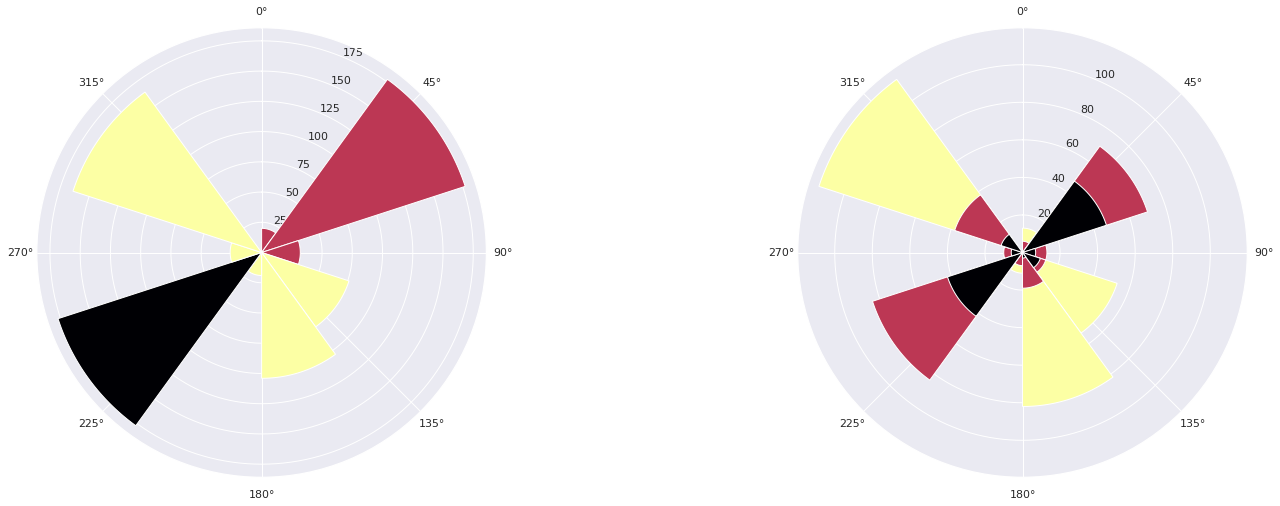

In [199]:
#Get only edges in neigh pair
dfSjb=dfEdgesAll5.loc[ dfEdgesAll5.neighPairUndirected == ('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste'), ] 

#Set the polar graph params
width =  2 * np.pi/n
ax = plt.subplot(121, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')

counts, div = np.histogram( dfSjb.bearingBucketRep, bins=bucketBearings  )
div=div[0:-1] 

    
print(counts, div)
    
#Plot the count for each grade bucket 
bars = ax.bar(div * np.pi/180 - width * 0.5 , 
                  counts, 
                  width=width, 
                  bottom=0.0)

#Second graph
ax = plt.subplot(122, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')

#Iterate over all possible grade categories/buckets/percentiles
for k in range(len(tupleGradeBuckets)):

    dfSjbGrade=dfSjb.loc[ dfSjb['gradeBuckets'] == tupleGradeBuckets[k],  ]
    counts, div = np.histogram( dfSjbGrade.bearingBucketRep , bins=bucketBearings )
    div=div[0:-1] 
    cols=dfSjbGrade.gradeBucketColor
    
    print(counts, div)
    
    #Plot the count for each grade bucket 
    bars = ax.bar(div * np.pi/180 - width * 0.5 , 
                  height=counts, 
                  width=width, 
                  bottom=0.0, 
                  color=cols)

In [158]:
from matplotlib.colors import ListedColormap

cmapRev=ListedColormap(cm.get_cmap('inferno',3).colors[::-1])
[cmapRev(i) for i in range(3)]

[(0.988362, 0.998364, 0.644924, 1.0),
 (0.735683, 0.215906, 0.330245, 1.0),
 (0.001462, 0.000466, 0.013866, 1.0)]

In [159]:
cols

[(0.001462, 0.000466, 0.013866, 1.0),
 (0.735683, 0.215906, 0.330245, 1.0),
 (0.988362, 0.998364, 0.644924, 1.0)]

In [160]:
cm.get_cmap('inferno',3).colors

array([[1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [7.35683e-01, 2.15906e-01, 3.30245e-01, 1.00000e+00],
       [9.88362e-01, 9.98364e-01, 6.44924e-01, 1.00000e+00]])

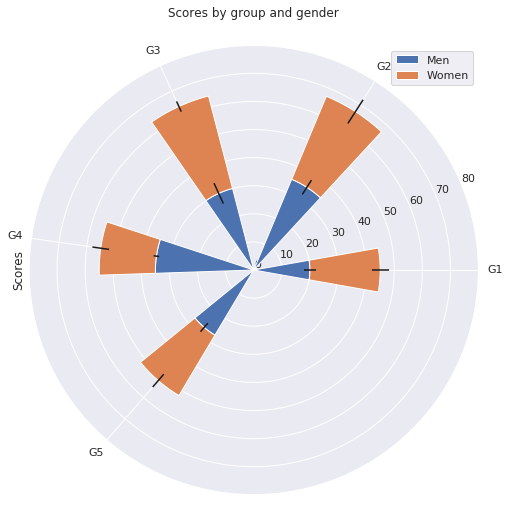

In [86]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ax = plt.subplot(111, projection='polar')

p1 = ax.bar(ind, menMeans, width, yerr=menStd)
p2 = ax.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

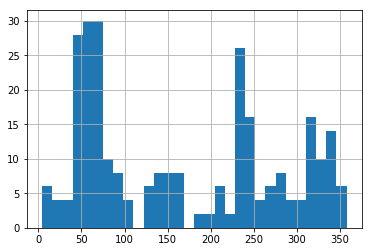

In [307]:
dfEdgesCCNeigh.bearing.hist(bins=30)

In [308]:
sns.distplot(dfEdgesCCNeigh.bearing' ,
            data= ,
             kde=False)

TypeError: distplot() got an unexpected keyword argument 'x'

In [304]:
n = 30
count, division = np.histogram(dfEdgesCCNeigh.bearing,
                               bins=[ang*360/n for ang in range(0,n+1)])
print(division)
division = division[0:-1]
print( division, "\nexpect this to be len(bins)-1 : " , 
      len(division) ,
      " and len(bins) - 1 ",
      len([ang*360/n for ang in range(0,n+1)]))



[  0.  12.  24.  36.  48.  60.  72.  84.  96. 108. 120. 132. 144. 156.
 168. 180. 192. 204. 216. 228. 240. 252. 264. 276. 288. 300. 312. 324.
 336. 348. 360.]
[  0.  12.  24.  36.  48.  60.  72.  84.  96. 108. 120. 132. 144. 156.
 168. 180. 192. 204. 216. 228. 240. 252. 264. 276. 288. 300. 312. 324.
 336. 348.] 
expect this to be len(bins)-1 :  30  and len(bins) - 1  31


In [296]:
 plt.show()

array([ 4,  4,  4, 22, 36, 26, 16,  8,  4,  0,  4, 10,  8,  8,  0,  2,  2,
        6,  2, 26, 16,  4,  8,  6,  4,  4, 16, 12, 14,  4])